In [54]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate
from mpl_toolkits.mplot3d import Axes3D

In [38]:
a = [[102.70048905177742, 584.5096518593116, 0], 
     [517.2548259296557, 780.7614389983071, 81], 
     [195.3136919713034, 427.9492374001128, 81], 
     [243.8253696910552, 278.0040517208803, 81], 
     [671.6101641288656, 749.8903713584651, 310], 
     [248.23552221103256, 533.7928978795711, 310], 
     [466.53807194991526, 225.08222148115112, 310], 
     [508.4345208897009, 672.7127022588602, 477], 
     [268.08120855093097, 513.9472115396727, 477]]

In [47]:
np.array(a).T[0]

array([102.70048905, 517.25482593, 195.31369197, 243.82536969,
       671.61016413, 248.23552221, 466.53807195, 508.43452089,
       268.08120855])

In [39]:
x_arr = []
y_arr = []
z_arr = []

for point in a:
    x_arr.append(point[0])
    y_arr.append(point[1])
    z_arr.append(point[2])

x_arr = np.array(x_arr)
y_arr = np.array(y_arr)
z_arr = np.array(z_arr)

In [40]:
dx = x_arr[1:] - x_arr[:-1]
dy = y_arr[1:] - y_arr[:-1]
dz = z_arr[1:] - z_arr[:-1]
ds = np.sqrt(dx**2 + dy**2 + dz**2) 

s = np.insert(np.cumsum(ds), 0, 0) # arc length
spx = interpolate.UnivariateSpline(s, x_arr)
spy = interpolate.UnivariateSpline(s, y_arr)
spz = interpolate.UnivariateSpline(s, z_arr)

s1 = np.linspace(s[0], s[-1], 20)
xs = spx(s1) # function x(s) that gives point 
ys = spy(s1)
zs = spz(s1)

In [41]:
# this is my tangent vector

dxs = np.array(spx.derivative()(s1))
dys = np.array(spy.derivative()(s1))
dzs = np.array(spz.derivative()(s1))

t = np.array([dxs, dys, dzs]).T

In [42]:
def generatePPlane(t):
    t / np.linalg.norm(t)

    # gram-schmidt orthogonalization
    V = np.vstack((t, [0, 0, 1], [0, 1, 0])).T
    U = np.zeros_like(V)

    U[:, 0] = V[:, 0] / np.linalg.norm(V[:, 0])

    for i in range(1,3):
        U[:, i] = V[:, i]
        for j in range(0,i):
            U[:, i] = U[:, i] - np.dot(U[:, i], U[:, j]) * U[:, j]
        
        U[:, i] = U[:, i] / np.linalg.norm(U[:, i])

    return U


In [43]:
pplane = []
for curr in t:
    print(generatePPlane(curr))

[[ 9.20238796e-01 -9.48296272e-02 -3.79694483e-01]
 [ 3.77694395e-01 -3.89210048e-02  9.25111939e-01]
 [ 1.02506111e-01  9.94732375e-01  7.50059924e-18]]
[[ 0.88674698 -0.13710356 -0.44145487]
 [ 0.43627102 -0.06745364  0.89728346]
 [ 0.1527985   0.98825736  0.        ]]
[[-7.09687346e-01  6.94907432e-01  1.15963494e-01]
 [ 8.28568195e-02 -8.11312475e-02  9.93253476e-01]
 [ 6.99627486e-01  7.14507790e-01  1.39720506e-17]]
[[-8.64515571e-01  2.36373108e-02 -5.02049904e-01]
 [-5.01862351e-01  1.37217614e-02  8.64838652e-01]
 [ 2.73314690e-02  9.99626426e-01  2.00583481e-18]]
[[-7.25490030e-01 -1.02565188e-02 -6.88156247e-01]
 [-6.88087488e-01 -9.72774535e-03  7.25562526e-01]
 [-1.41359544e-02  9.99900082e-01 -2.39086697e-18]]
[[-2.88981449e-01 -6.65732528e-03 -9.57311549e-01]
 [-9.57057622e-01 -2.20479340e-02  2.89058122e-01]
 [-2.30310958e-02  9.99734749e-01  3.60077786e-17]]
[[ 0.58401367 -0.04766718  0.81034306]
 [-0.80765729  0.06592097  0.58595573]
 [ 0.08134946  0.99668564  0.     

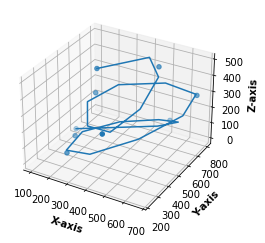

In [52]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(np.array(a).T[0], np.array(a).T[1], np.array(a).T[2])
ax.plot(xs, ys, zs)
# plt3d.plot_surface(xx, yy, z, alpha=0.2)
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()